In [1]:
!pip install matplotlib
!pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
#read the csv file of bollywood dataset
df = pd.read_csv('./bollywood.csv')
df

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762


In [3]:
# 1.How many records are present in the dataset? Print the metadata information of the dataset.
records = df.shape[0]
print("No.of records in the dataset ", records)
df.info()

No.of records in the dataset  149
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   Release Date         149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB


In [4]:
# 2.How many movies got released in each genre? which genre had highest number of releases? sort number of releases in each genre in descending order
#movies released in each genre
genre = df['Genre'].value_counts()
print(genre)
#genre had highest number of releases
print(f"{genre.max()} releases for the genre of {genre.idxmax()}")
#sort number of releases in each genre in descending order
genre.sort_values(ascending=False)

Genre
Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: count, dtype: int64
36 releases for the genre of Comedy


Genre
Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: count, dtype: int64

In [5]:
# 3.How many movies in each genre got released in different release times like long weekend, festive seasons etc.(Note: Do a cross tabulation between the genre and release time)
pd.crosstab(df['Genre'],df['ReleaseTime'])

ReleaseTime,FS,HS,LW,N
Genre,,,,
Drama,4,6,1,24
Action,3,3,3,12
Action,0,0,0,3
Comedy,3,5,5,23
Romance,3,3,4,15
Thriller,4,1,1,20
Thriller,0,0,1,2


In [6]:
# 4.which month of the year, maximum number of movie releases are seen? (Note: Extract new column called month from the ReleaseDate Column)
df['Release Date'] = pd.to_datetime(df['Release Date'],format="%d-%b-%y")
# %b--> Month as locale’s abbreviated name, %d --> Day of the month as a zero-padded decimal number, %Y --> Year with century as a decimal number.
# %B --> Month as locale’s full name.
df['Release Month'] = df['Release Date'].dt.strftime('%b')
#df['Release Year'] = df['Release Date'].dt.strftime('%Y')
print(f"Maximum number of releases in {df['Release Month'].value_counts().idxmax()} with {df['Release Month'].value_counts().max()} movies")

Maximum number of releases in Jan with 20 movies


In [7]:
# 5.which month of the year typically sees most number of releases of high budgeted movies, that is, movies with a budget of 25 crore or more?
high_budget_movies = df[df['Budget']>=25][['Release Month']].value_counts()
print(f"{high_budget_movies.idxmax()[0]} has the {high_budget_movies.max()} of releases of high budgeted movies")


Feb has the 9 of releases of high budgeted movies


In [8]:
# 6.which are the top 10 movies with maximum return on investment(ROI)? Calculate return on investment(ROI) as (BoxOfficeCollection-Budget)/Budget
df['ROI'] = (df['BoxOfficeCollection']-df['Budget'])/df['Budget']
top_10_Movies = df[['MovieName','ROI']].sort_values(by=['ROI'],ascending = False).head(10)
print(top_10_Movies)

                     MovieName       ROI
64                  Aashiqui 2  8.166667
89                          PK  7.647059
132                Grand Masti  7.514286
135               The Lunchbox  7.500000
87                      Fukrey  6.240000
58                    Mary Kom  5.933333
128                     Shahid  5.666667
37   Humpty Sharma Ki Dulhania  5.500000
101         Bhaag Milkha Bhaag  4.466667
115            Chennai Express  4.266667


In [9]:
# 7.Do the movies have the higher ROI if they get released on festive seasons or long weekend? calculate the average ROI for different release times.
df.groupby('ReleaseTime')['ROI'].mean()    

ReleaseTime
FS    0.973853
HS    0.850867
LW    1.127205
N     0.657722
Name: ROI, dtype: float64

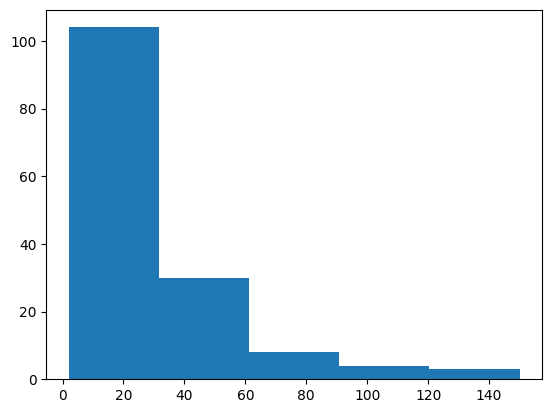

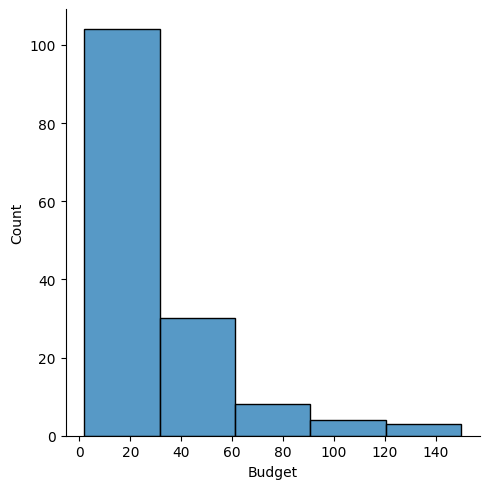

In [10]:
# 8.Draw the histogram and a distribution plot to find out the distribution of movie budgets. Interpret the plot to conclude if the most movies are high or low budgeted movies
plt.hist(df['Budget'],bins=5)
sns.displot(df['Budget'],bins=5)
# Maximum movies are low budgeted movies

<Axes: xlabel='Genre', ylabel='ROI'>

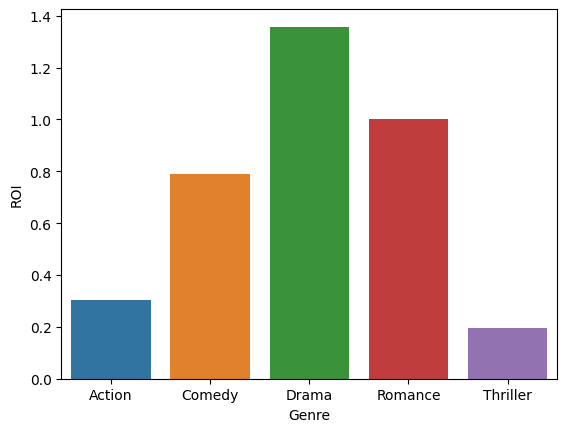

In [11]:
# 9.Compare the distribution of ROI's between the movies with comedy genre and drama. which gener typically sees higher ROIs?
# Strip whitespace and convert to lowercase (optional)
df['Genre'] = df['Genre'].str.strip().str.title()  # Converts to title case (e.g., "action" -> "Action")
genre_roi = df.groupby('Genre')['ROI'].mean().reset_index()
sns.barplot(x="Genre",y="ROI",data=genre_roi,hue="Genre")

<Axes: >

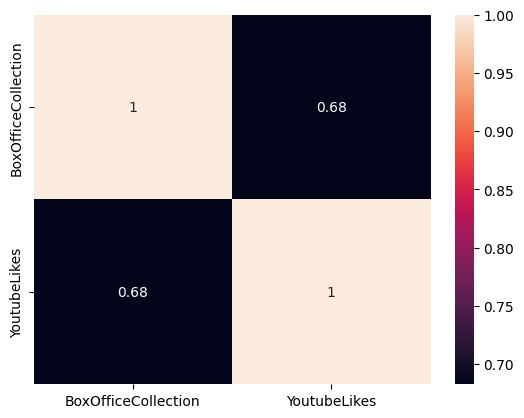

In [12]:
# 10.Is there any correlation between box office collection and Youtube likes? Is the correlation positive or negative?
sns.heatmap(df[['BoxOfficeCollection','YoutubeLikes']].corr(), annot=True)

<Axes: xlabel='Genre', ylabel='YoutubeLikes'>

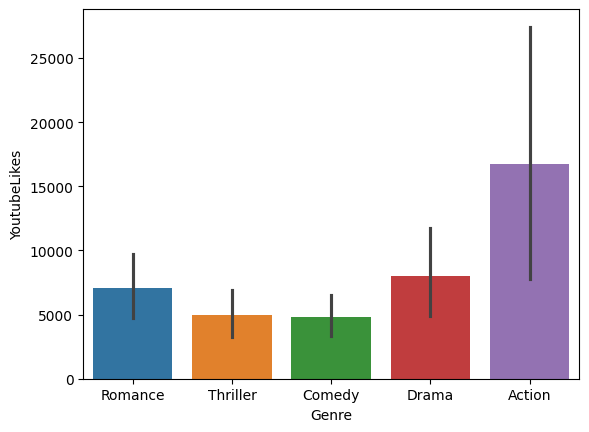

In [13]:
# 11.which genre of movies typically sees more Youtube likes? Draw the box plots for each genre of movies to compare.
sns.barplot(x='Genre',y='YoutubeLikes',data=df,hue='Genre')

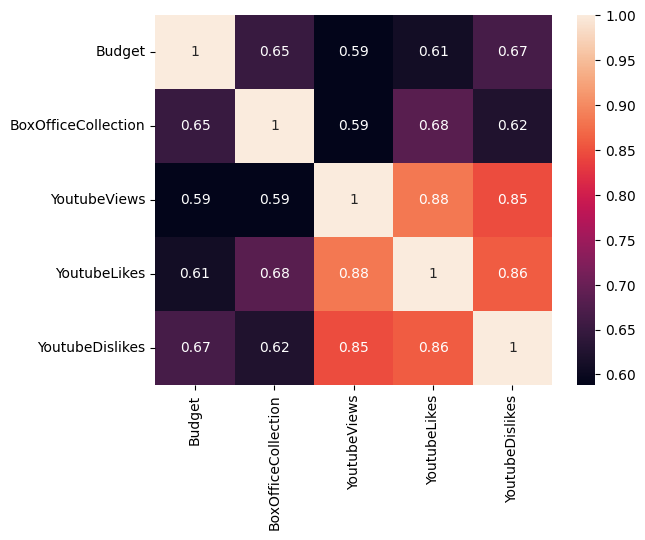

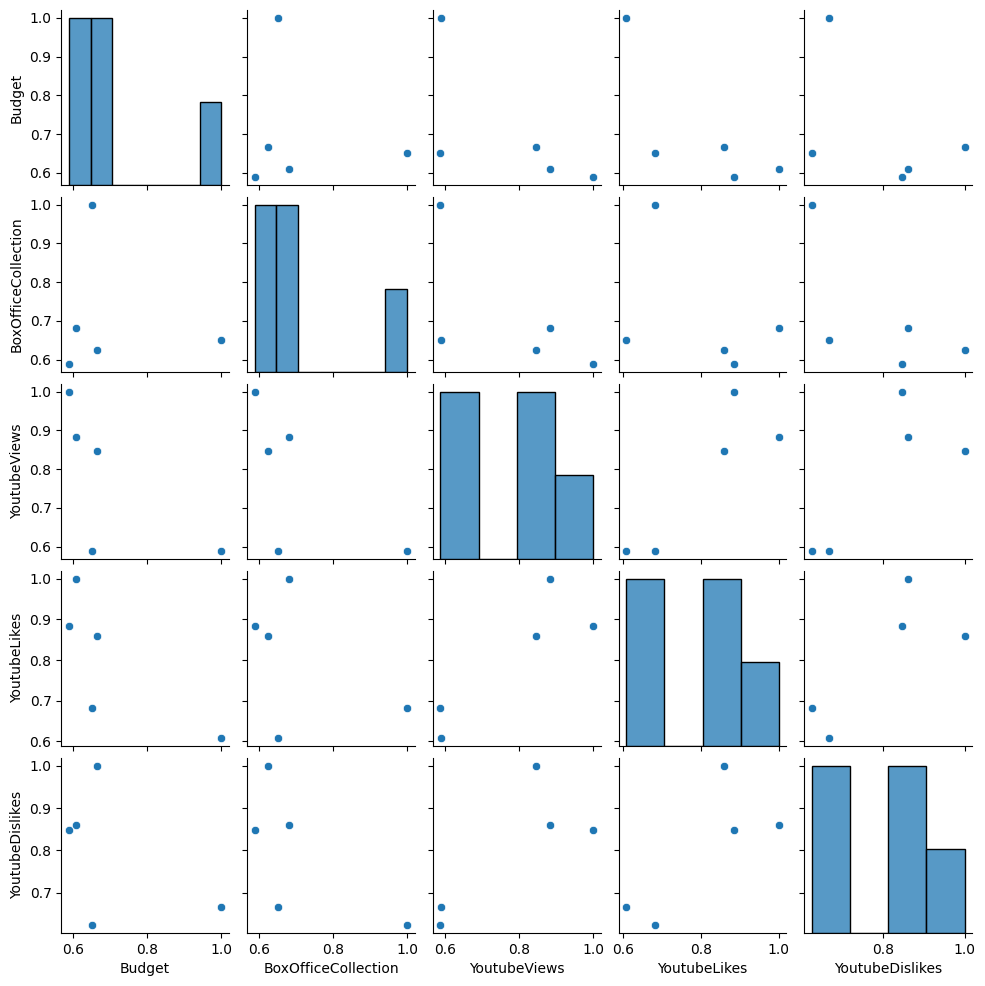

In [14]:
# 12.which of the variables among the budget, Box office collections, YoutubeView, YoutubeLikes, YoutubeDislikes are higly correlated? Note: Draw the pairplot or heat map.
sns.heatmap(df[['Budget','BoxOfficeCollection','YoutubeViews','YoutubeLikes','YoutubeDislikes']].corr(), annot=True)
sns.pairplot(df[['Budget','BoxOfficeCollection','YoutubeViews','YoutubeLikes','YoutubeDislikes']].corr(), height=2)